In [1]:
import cv2
import os
from tensorflow import keras
from keras.models import load_model
import numpy as np
#from pygame import mixer
import time

In [2]:
new_model = load_model('./models/cnnBasic.h5')

In [3]:
img_size = 224
img_array = cv2.imread('./dataset/train/open//s0001_01868_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

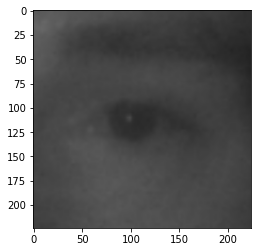

In [4]:
import matplotlib.pyplot as plt
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
plt.imshow(new_array)

In [5]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[0.96162736]], dtype=float32)

In [25]:
import cv2

faceCascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_eye.xml")

cap = cv2.VideoCapture(0)
count=0
while True:
    ret, frame = cap.read()
    height,width = frame.shape[:2] 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, minNeighbors=5,scaleFactor=1.1)
    
    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2) #blue
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh),(0,255,0), 2) #green
            eye = roi_color[ey:ey+eh, ex:ex+ew]
            #count=count+1
            #eye = cv2.cvtColor(eye,cv2.COLOR_BGR2GRAY)
            eye = cv2.resize(eye, (img_size, img_size))
            eye = np.expand_dims(eye, axis=0)
            eye= eye / 255
            prediction = new_model.predict(eye)
            if(prediction[0] > 0.5):
                print('Open') 
            else:
                print('Closed')
            break
                
    cv2.imshow('h', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
    

Open
Open
Open
Open
Open
Open
Open
Open
Open
Open
Open
Open
Open
Open
Closed
Closed
Closed
Closed
Closed
Closed
Closed
Closed
